In [233]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [234]:
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [237]:
data.duplicated().sum()

0

In [238]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [239]:
data.drop('Cabin', axis=1,inplace=True)

In [240]:
data.dropna(inplace=True)

In [241]:
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [242]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [243]:
data.describe(include = 'all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.0,889.00,889.00,889,889,889.00,889.00,889.00,889,889.00,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.0,0.38,2.31,NaN,NaN,29.65,0.52,0.38,NaN,32.10,NaN
std,257.0,0.49,0.83,NaN,NaN,12.97,1.10,0.81,NaN,49.70,NaN
min,1.0,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN
25%,224.0,0.00,2.00,NaN,NaN,22.00,0.00,0.00,NaN,7.90,NaN
50%,446.0,0.00,3.00,NaN,NaN,29.70,0.00,0.00,NaN,14.45,NaN
75%,668.0,1.00,3.00,NaN,NaN,35.00,1.00,0.00,NaN,31.00,NaN


In [244]:
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


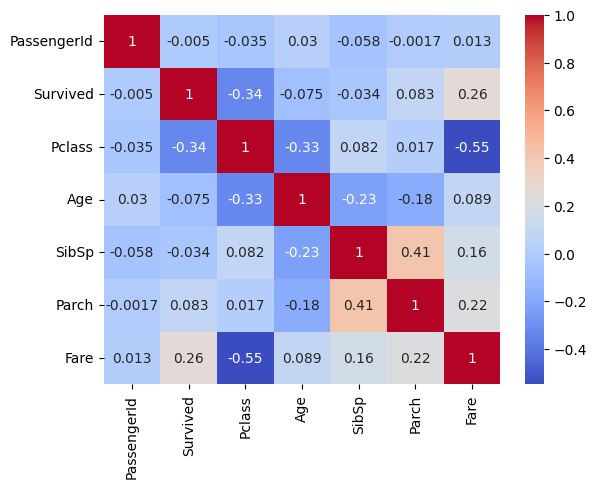

In [245]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [246]:
data["PassengerId"].count()

889

In [247]:
data.set_index("PassengerId", inplace=True)

In [248]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [249]:
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

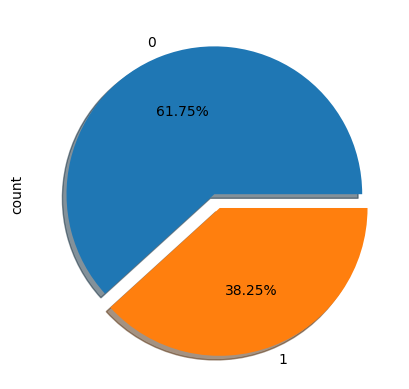

In [250]:
%matplotlib inline
data.Survived.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0,0.1])
plt.show()

In [251]:
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

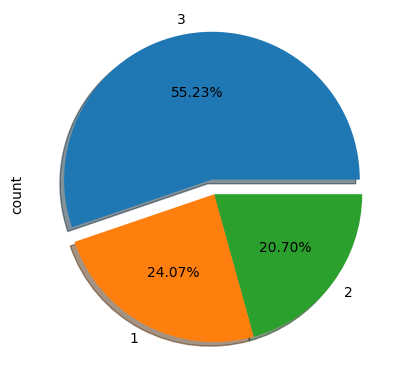

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
data.Pclass.value_counts().plot(kind='pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0,0])
plt.show()


In [253]:
data["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

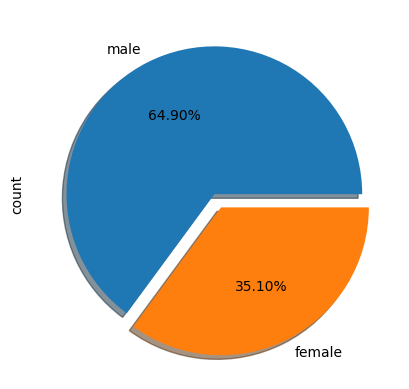

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
data.Sex.value_counts().plot(kind='pie', autopct="%0.2f%%", shadow=True, explode=[0,0.1])

# Display the plot
plt.show()

In [255]:
data["Age"].max()

80.0

In [256]:
data["Age"].min()

0.42

In [257]:
data.Age.hist()
plt.title("the freq of Age", fontsize=15)
plt.xlabel("the age", fontsize=15)
plt.ylabel("the count", fontsize=15)
plt.show()

In [258]:
sns.distplot(data['Age'], hist=False)
plt.show()

In [259]:
data["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [260]:
sns.distplot(data['SibSp'], hist=False)
plt.show()

In [261]:
data["Parch"].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [262]:
sns.distplot(data['Parch'], hist=False)
plt.show()

In [263]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [264]:
%matplotlib notebook
data.Embarked.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0,0])
plt.show()

In [265]:
data.groupby("Sex").agg({
    "Survived" : "value_counts"
})

Survived
Sex    Survived          
female 1              231
       0               81
male   0              468
       1              109

In [266]:
data.groupby(data["Survived"]).agg({
    "Age" : "mean"
})

,Age
Survived,
0,30.4151
1,28.4236


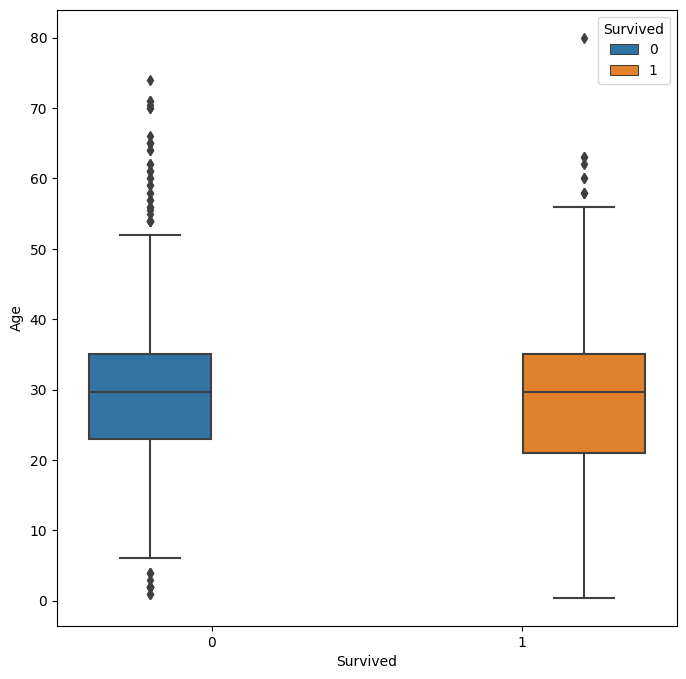

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", hue="Survived", data=data)
plt.show()

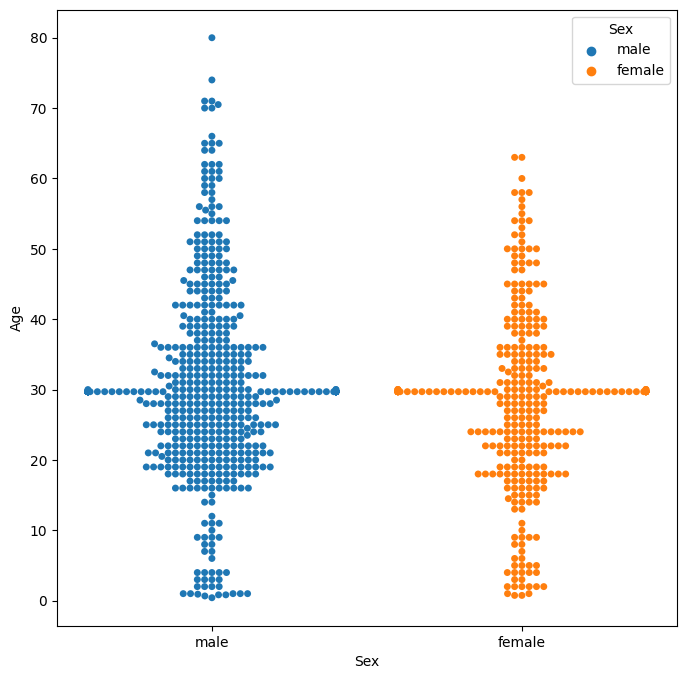

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=data)
plt.show()

In [269]:
data.groupby("Pclass").agg({
    "Survived" : "value_counts"
})

Survived
Pclass Survived          
1      1              134
       0               80
2      0               97
       1               87
3      0              372
       1              119

In [270]:
data.groupby("Embarked").agg({
    "Survived" : "value_counts"
})

Survived
Embarked Survived          
C        1               93
         0               75
Q        0               47
         1               30
S        0              427
         1              217

In [271]:
data.groupby("SibSp").agg({
    "Survived" : "value_counts"
})

Survived
SibSp Survived          
0     0              398
      1              208
1     1              112
      0               97
2     0               15
      1               13
3     0               12
      1                4
4     0               15
      1                3
5     0                5
8     0                7

In [272]:
data.groupby(["Sex", "Pclass"]).agg({
    "Survived" : "value_counts"
})

Survived
Sex    Pclass Survived          
female 1      1               89
              0                3
       2      1               70
              0                6
       3      0               72
              1               72
male   1      0               77
              1               45
       2      0               91
              1               17
       3      0              300
              1               47

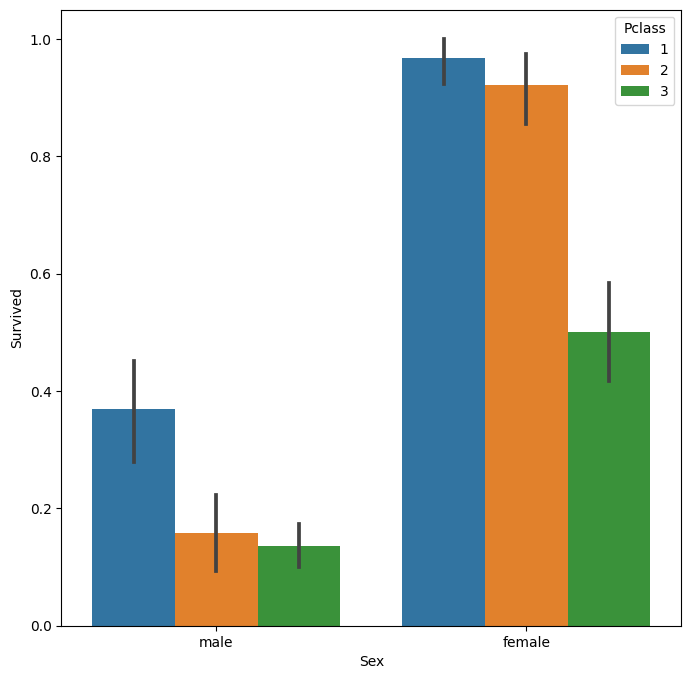

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data)
plt.show()

In [274]:
data.groupby("Sex").agg({
    "Survived" : "value_counts"
})

Survived
Sex    Survived          
female 1              231
       0               81
male   0              468
       1              109

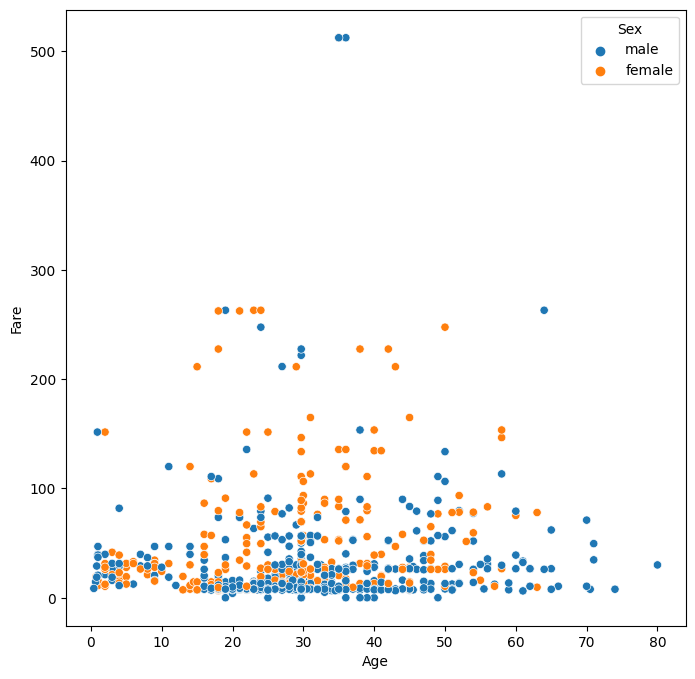

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=data)
plt.show()

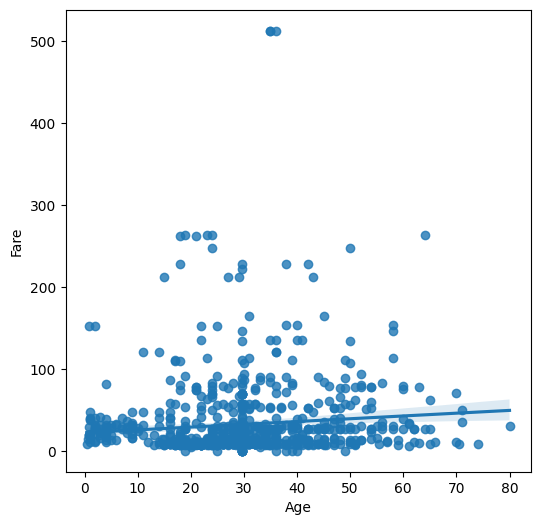

In [283]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(6, 6))
sns.regplot(x="Age", y="Fare", data=data)
plt.show()